<a href="https://colab.research.google.com/github/MohaYass92/Gender-Detection-on-Masked-Faces-with-CNN/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 858ms/step - accuracy: 0.5245 - loss: 2.9756 - val_accuracy: 0.4799 - val_loss: 1.1953
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 81s 837ms/step - accuracy: 0.5716 - loss: 0.8726 - val_accuracy: 0.4844 - val_loss: 2.5817
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 48s 853ms/step - accuracy: 0.5359 - loss: 0.8121 - val_accuracy: 0.5156 - val_loss: 2.4012
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 914ms/step - accuracy: 0.5976 - loss: 0.6917 - val_accuracy: 0.4821 - val_loss: 0.7645
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 836ms/step - accuracy: 0.6325 - loss: 0.6718 - val_accuracy: 0.5156 - val_loss: 1.0931
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 844ms/step - accuracy: 0.6563 - loss: 0.6531 - val_accuracy: 0.5625 - val_loss: 1.0215
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 877ms/step - accuracy: 0.6236 - loss: 0.6834 - val_accu

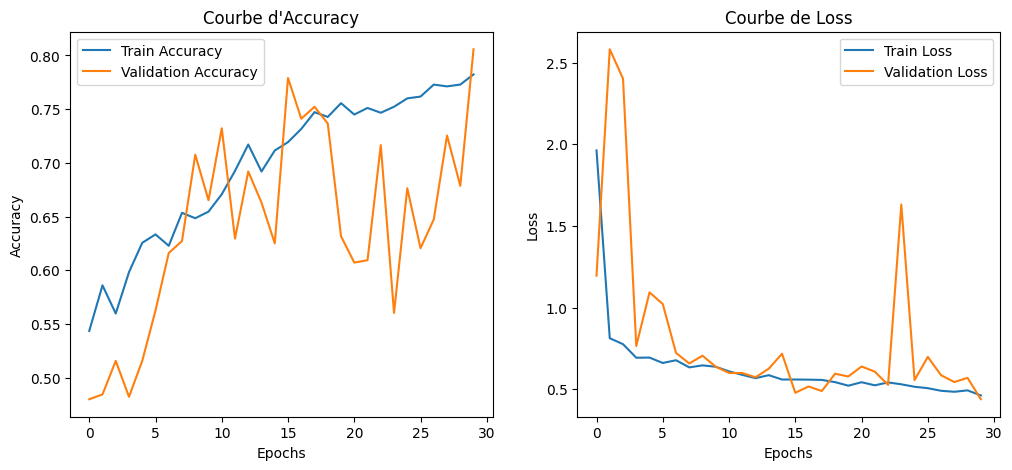

In [5]:
# ⬇️ Monter Google Drive pour accéder au dataset
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization


# ✅ Définition du chemin du dataset dans Google Drive
dataset_path = "/content/drive/MyDrive/gender_detection_dataset"
man_folder = os.path.join(dataset_path, "Male")
woman_folder = os.path.join(dataset_path, "Female")

# ✅ Paramètres du modèle
IMG_SIZE = 64
BATCH_SIZE = 32
EPOCHS = 30

# ✅ Chargement et prétraitement des images
data = []
labels = []

def load_images(folder, label):
    """Charge les images depuis Google Drive, les redimensionne et stocke avec leur label."""
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0  # Normalisation (0-1)
            data.append(img)
            labels.append(label)

# Charger les images des classes
load_images(man_folder, 0)  # 0 = Homme
load_images(woman_folder, 1)  # 1 = Femme

# Convertir en NumPy arrays
data = np.array(data, dtype=np.float32)
labels = np.array(labels)

# Diviser en ensembles d'entraînement et de test
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, random_state=42)

# Transformation des labels en one-hot encoding
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

# ✅ Data Augmentation pour améliorer la robustesse du modèle
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(trainX)

# ✅ Définition du modèle CNN

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# ✅ Entraînement du modèle avec Data Augmentation
history = model.fit(datagen.flow(trainX, trainY, batch_size=BATCH_SIZE),
                    epochs=EPOCHS,
                    validation_data=(testX, testY))

# ✅ Évaluation finale du modèle
test_loss, test_acc = model.evaluate(testX, testY)
print(f"✅ CNN Accuracy: {test_acc:.2%}")

# ✅ Sauvegarde du modèle dans Google Drive
model.save("/content/drive/MyDrive/gender_classification_cnn.keras")

# ✅ Affichage des courbes de performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Courbe d'Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Courbe de Loss")

plt.show()


In [17]:
# 📌 Installer Git (si nécessaire)
!apt install git

# 📌 Configurer ton nom et email Git
!git config --global user.name "MohaYass92"
!git config --global user.email "yacinegherdaine31@gmail.com"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [20]:
!git clone https://github.com/MohaYass92/Gender-Detection-on-Masked-Faces-with-CNN.git


Cloning into 'Gender-Detection-on-Masked-Faces-with-CNN'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
